In [1]:
# Put import statements here
from sklearn.datasets import load_iris
import random
random.seed(15)
%matplotlib inline

# DSCI6003 Lab - SVM

Today we will be implementing sklearn's version of SVM. For those of you who are curious, the SVM practicums contain more information about implementing your own version of SVM.

Today We Will:

    1. Learn how the parameters influence the decision boundary for SVM
    2. Compare and contrast an SVM to see how it differs from Logistic Regression.
    3. Using SVMs to deal with unbalaanced classes

### Part 1 - Parameter Tuning

1. Load in the rbf_data and the rbf_labels dataset using pandas (make sure to set delim_whitespace=True and header = None).
2. Plot the data using matplotlib, setting the c attribute to labels for the points. 
3. Plot gamma from [0.1,0.3,1,3,10], keeping C constant at 1. What do you notice?
4. Plot C from [1E-1,1,10,100] holding gamma constant at 3. What do you notice?
5. This may take a while, but plot gamma at 250. What do you notice? 


### Part 2 - Compare and Contrast

1. We will be using the iris dataset. Load in the iris dataset from sklearn. 
2. Make the classfication binary by changing any 2 label to a 1.
3. Plot the the third and fourth columns of the dataset (watch out for indexing!). Use plt.copper() before plt.show() to change the color of the points (or use your favorite colormap).
4. Run a Logistic Regression Classifier (LRC) on the third and fourth columns and plot the boundary. What do you notice about the boundary? (Use the function below to plot the decision boundary.
5. Now, run an SVM on the third and fourth column, and use the function below to plot the boundary. What do you notice? Which kernel can you use to correctly classify the last point?
6. Now run steps 3 - 5 again, except now you will change every 2 into a 0 rather than a one. What do you notice about the decision boudaries? 
7. To get an even better understanding of why we might prefer SVMs over LRC, load in the data_scientist.csv data. Plot it with a logistic regression and SVM decision boundary. What do you notice? 

### Part 3 - Imbalanced Classes

Let's pretend this data now corresponds to credit card fraud, where a true positive means saving thousands of dollars and maintaining customer loyalty while a false positive means us calling the customer and having them confirm that they were the ones to make the purchase (a small cost for letting fraudsters escape). How can you catch as many true positives (fraudsters) as possible? 

1. Now create variables X_small, y_small which are subsets of the iris data. You can run the "annihilate_data" function to remove the data.
2. What do the class counts look like now? Plot the data.
3. Run an LRC and plot the decision boundary. What is the behavior of the model? 
4. Now plot the decision boundary for an SVM. What is the behavior? Change the kernels. Does anything happen? 
5. Now as the data scientist, you should be able to look at documentation and figure out what the best tool for the job will be. Looking at the SVC inputs, what variable can you change to fix this problem? Plot the decision boundary after you have made this adjustment.


In [1]:
def annihilate_data(X,y,num=10):
    y_0 = len(X[y == 0])
    y_1 = len(X[y == 1])
    smaller = 0 if y_0 < y_1 else 1
    idx = np.random.choice(np.where(y == smaller)[0],size = num)
    full_idx = np.append(np.where(y != smaller)[0],idx)
    return X[full_idx],y[full_idx]

In [2]:
def decision_boundary(clf, X, Y, h=.02):
    """Inputs:
        clf - a trained classifier, with a predict method
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

- Part 1 - Parameter Tuning
- Load in the rbf_data and the rbf_labels dataset using pandas (make sure to set delim_whitespace=True and header = None).
- Plot the data using matplotlib, setting the c attribute to labels for the points.
- Plot gamma from [0.1,0.3,1,3,10], keeping C constant at 1. What do you notice?
- Plot C from [1E-1,1,10,100] holding gamma constant at 3. What do you notice?
- This may take a while, but plot gamma at 250. What do you notice?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


In [4]:
rbf_df = pd.read_table('rbf_data.csv',header=None,delim_whitespace=True)
rbf_df_labels = pd.read_table('rbf_labels.csv',header=None,delim_whitespace=True)

In [5]:
rbf_df.head()

0         1
0  3.809354  1.359434
1 -1.051587 -4.182628
2 -2.690264  3.499521
3  2.721809  2.840617
4  1.854563 -4.144340

In [6]:
rbf_df_labels.head()

0
0  1.0
1 -1.0
2  1.0
3  1.0
4 -1.0

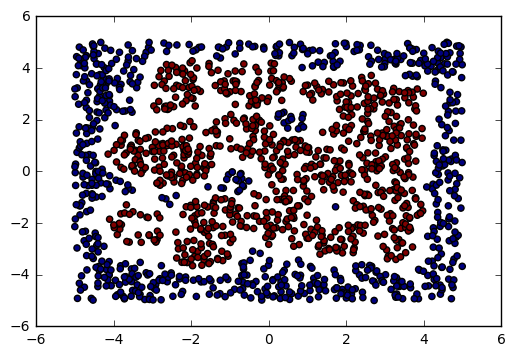

In [7]:
plt.scatter(rbf_df[0],rbf_df[1],c=rbf_df_labels)


In [8]:
# Plot gamma from [0.1,0.3,1,3,10], keeping C constant at 1.

svm_pointone = SVC(C=1.0,gamma=.1)
svm_pointone.fit(rbf_df,rbf_df_labels)

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

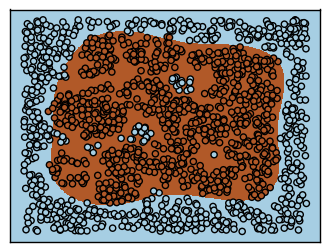

In [9]:
decision_boundary(svm_pointone,np.array(rbf_df),np.array(rbf_df_labels))

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


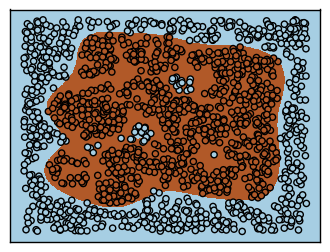

In [10]:
# Plot gamma from [0.1,0.3,1,3,10], keeping C constant at 1.

svm_pointthree = SVC(C=1.0,gamma=.3)
svm_pointthree.fit(rbf_df,rbf_df_labels)
decision_boundary(svm_pointthree,np.array(rbf_df),np.array(rbf_df_labels))

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


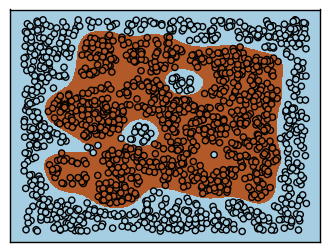

In [11]:
# Plot gamma from [0.1,0.3,1,3,10], keeping C constant at 1.

svm_one = SVC(C=1.0,gamma=1)
svm_one.fit(rbf_df,rbf_df_labels)
decision_boundary(svm_one,np.array(rbf_df),np.array(rbf_df_labels))

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


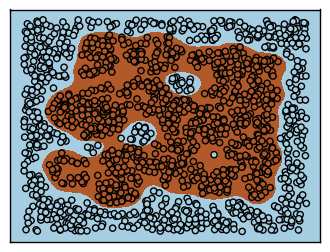

In [39]:
# Plot gamma from [0.1,0.3,1,3,10], keeping C constant at 1.

svm_three = SVC(C=1.0,gamma=3)
svm_three.fit(rbf_df,rbf_df_labels)
decision_boundary(svm_three,np.array(rbf_df),np.array(rbf_df_labels))

- As we increase gamma, the sklearn plot shifts from to use more weight on  a Radial Basis Kernel. WIth gamma at 0, we use a linear kernel. As we increse gamma, the decision boundary around the points in the middle increses.

> Plot C from [1E-1,1,10,100] holding gamma constant at 3. What do you notice?

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 C = 0.1, Gamma = 3


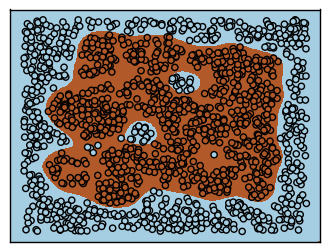

 C = 1, Gamma = 3


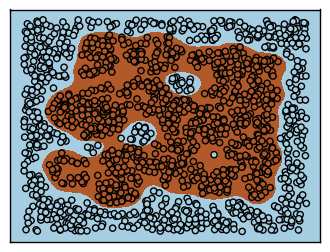

 C = 10, Gamma = 3


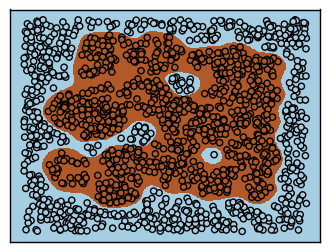

 C = 100, Gamma = 3


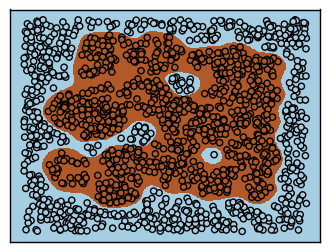

In [42]:
# Plot gamma from [0.1,0.3,1,3,10], keeping C constant at 1.

for i in [.1,1,10,100]:
    
    svm_four = SVC(C=i,gamma=3)
    svm_four.fit(rbf_df,rbf_df_labels)
    print(' C = {}, Gamma = 3'.format(i))
    decision_boundary(svm_four,np.array(rbf_df),np.array(rbf_df_labels))

- As we increase the error term associated with incorrect categorizations, the boundary between the classes becomes more rigid. This could be an example of SVM ' overtraining' the model. As we increase the penalty term, we make it so that there are NO incorrect categorizations.

> This may take a while, but plot gamma at 250. What do you notice?

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


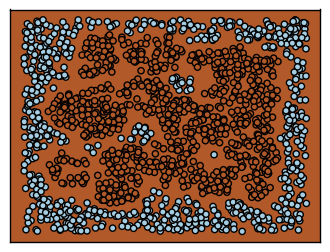

In [43]:


svm_five = SVC(C=1.0,gamma=250)
svm_five.fit(rbf_df,rbf_df_labels)
decision_boundary(svm_five,np.array(rbf_df),np.array(rbf_df_labels))

- With a gamma of 250, SVM categorizes everything as being the same class. 

- Part 2 - Compare and Contrast

We will be using the iris dataset. Load in the iris dataset from sklearn.

Make the classfication binary by changing any 2 label to a 1.

Plot the the third and fourth columns of the dataset (watch out for indexing!). Use plt.copper() before plt.show() to 
change the color of the points (or use your favorite colormap).

Run a Logistic Regression Classifier (LRC) on the third and fourth columns and plot the boundary. What do you notice about the boundary? (Use the function below to plot the decision boundary.

Now, run an SVM on the third and fourth column, and use the function below to plot the boundary. What do you notice? 

Which kernel can you use to correctly classify the last point?

Now run steps 3 - 5 again, except now you will change every 2 into a 0 rather than a one. What do you notice about the decision boudaries?

To get an even better understanding of why we might prefer SVMs over LRC, load in the data_scientist.csv data. Plot it with a logistic regression and SVM decision boundary. What do you notice?

In [46]:
data_iris ,labels_iris= load_iris(True)


In [47]:
labels_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
## Binary classification , change 2 to 1
labels_iris[labels_iris==2]=1

NameError: name 'labels_iris' is not defined

In [ ]:
labels_iris

Plot the the third and fourth columns of the dataset (watch out for indexing!). Use plt.copper() before plt.show() to change the color of the points (or use your favorite colormap).

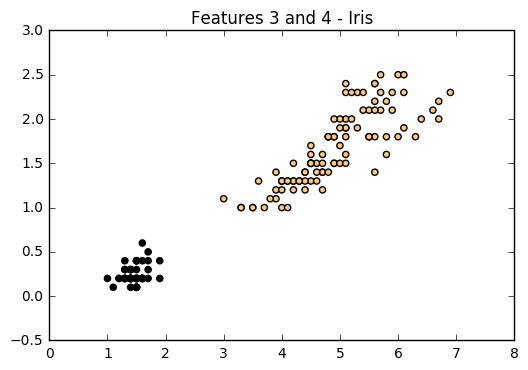

In [65]:

plt.scatter(data_iris[:,2],data_iris[:,3],c=labels_iris)
plt.copper()
plt.title('Features 3 and 4 - Iris')

Run a Logistic Regression Classifier (LRC) on the third and fourth columns and plot the boundary. What do you notice about the boundary? (Use the function below to plot the decision boundary.

# 2's = 1's for Iris

In [68]:
logistic = LogisticRegression()

In [131]:
logistic.fit(data_iris[:,:2],labels_iris)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

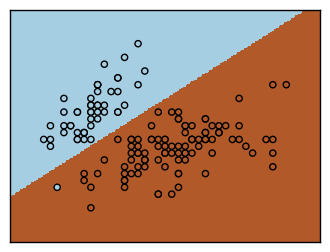

In [132]:
decision_boundary(logistic,np.array(data_iris[:,:2]),np.array(labels_iris))

- The boundary seems to be right a straight line in between the two classses

Now, run an SVM on the third and fourth column, and use the function below to plot the boundary. What do you notice?

In [133]:
svm_iris = SVC(kernel='rbf').fit(data_iris[:,:2],labels_iris)

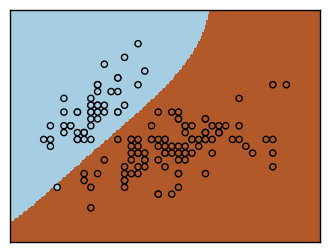

In [134]:
decision_boundary(svm_iris,np.array(data_iris[:,:2]),np.array(labels_iris))

- Using the Radial Basis Kernel, the bdecision boundary is not linear and therefore is more flexible to classify points.

- Which kernel can you use to correctly classify the last point?

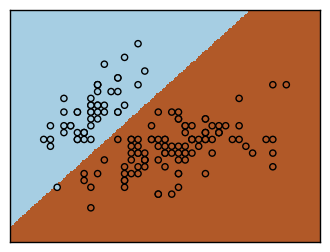

In [135]:
svm_iris = SVC(kernel='linear').fit(data_iris[:,:2],labels_iris)
decision_boundary(svm_iris,np.array(data_iris[:,:2]),np.array(labels_iris))

In [ ]:
# SLightly different decision boundary with a linear boundar than logistic

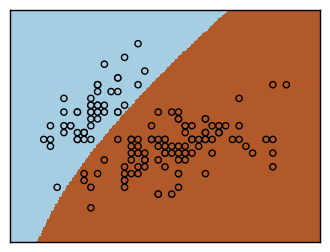

In [136]:
svm_iris = SVC(kernel='poly').fit(data_iris[:,:2],labels_iris)
decision_boundary(svm_iris,np.array(data_iris[:,:2]),np.array(labels_iris))

- Poly kernel get the last point correct.

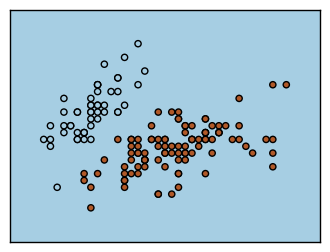

In [137]:
svm_iris = SVC(kernel='sigmoid').fit(data_iris[:,:2],labels_iris)
decision_boundary(svm_iris,np.array(data_iris[:,:2]),np.array(labels_iris))

- Sigmoid classifies everything as blue.

- Poly kernel gets the last point correct.

###### Now run steps 3 - 5 again, except now you will change every 2 into a 0 rather than a one. What do you notice about the decision boudaries?

# 2's = 0's for iris data

In [13]:
data_iris ,labels_iris_2= load_iris(True)

In [14]:
labels_iris_2[labels_iris_2==2]=0

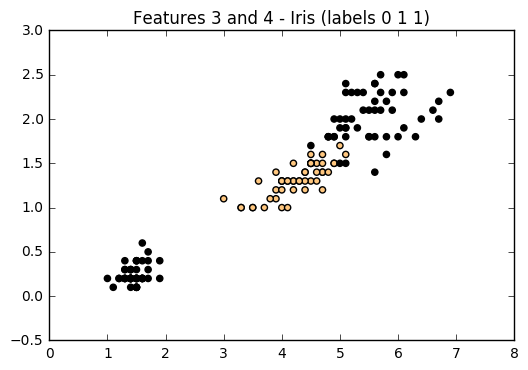

In [15]:

plt.scatter(data_iris[:,2],data_iris[:,3],c=labels_iris_2)
plt.copper()
plt.title('Features 3 and 4 - Iris (labels 0 1 1)')

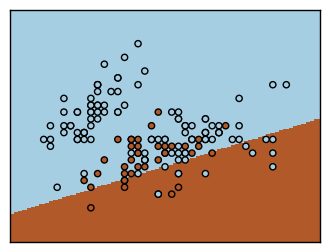

In [138]:
logistic_2 = LogisticRegression()
logistic_2.fit(data_iris[:,:2],labels_iris_2)
decision_boundary(logistic_2,np.array(data_iris[:,:2]),np.array(labels_iris_2))

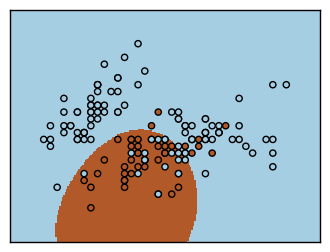

In [139]:
svm_iris = SVC(kernel='rbf').fit(data_iris[:,:2],labels_iris_2)
decision_boundary(svm_iris,np.array(data_iris[:,:2]),np.array(labels_iris_2))

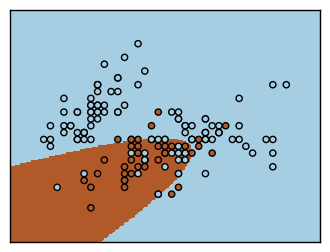

In [140]:
svm_iris = SVC(kernel='poly').fit(data_iris[:,:2],labels_iris_2)
decision_boundary(svm_iris,np.array(data_iris[:,:2]),np.array(labels_iris_2))

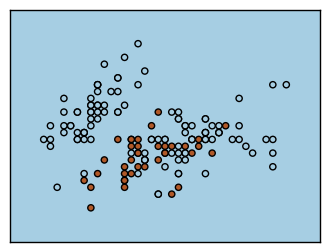

In [141]:
svm_iris = SVC(kernel='sigmoid').fit(data_iris[:,:2],labels_iris_2)
decision_boundary(svm_iris,np.array(data_iris[:,:2]),np.array(labels_iris_2))

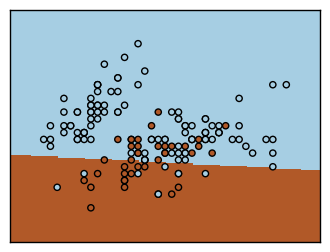

In [142]:
svm_iris = SVC(kernel='linear').fit(data_iris[:,:2],labels_iris_2)
decision_boundary(svm_iris,np.array(data_iris[:,:2]),np.array(labels_iris_2))

- Here, the kernel that perfoms well is the Radial Basis Kernel or Poly kernel. Kernels with a strict boundary perform worse than a flexible boundary..

>To get an even better understanding of why we might prefer SVMs over LRC, load in the data_scientist.csv data. Plot it with a logistic regression and SVM decision boundary. What do you notice?

In [96]:
data_science_df = pd.read_csv('data_scientist.csv')

In [109]:
data_science_df

email_hours  gym_hours  data_scientist
0     18.995746   6.879446               1
1     19.178514   5.954391               1
2     20.895603  11.638996               1
3     22.242337  10.323360               1
4     38.854161  26.899764               0
5     34.078370  28.292012               0
6     12.126729   7.544094               1
7     38.072148  42.610761               0
8     34.363463  47.715896               0
9     20.402499  14.147859               1
10    26.921772  25.546569               0
11    34.878313  46.521009               0
12     8.943283   8.084466               1
13    11.101769   7.064280               1
14     9.534155   9.015084               1
15    33.947323  39.140643               0
16    20.245110   8.732532               1
17    39.723206  35.429368               0
18    36.619573  33.904676               0
19    30.139523  33.077574               0

In [116]:
data_science_df_x=data_science_df.iloc[:,:2]

In [117]:
data_science_df_y=data_science_df.iloc[:,2]

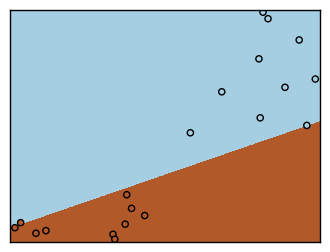

In [120]:
logistic_3 = LogisticRegression()
logistic_3.fit(data_science_df_x,data_science_df_y)
decision_boundary(logistic_3,np.array(data_science_df_x),np.array(data_science_df_y))


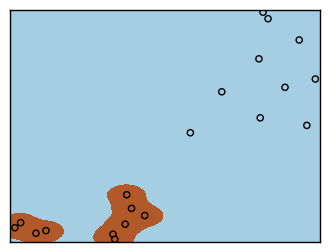

In [121]:
svm_ds = SVC(kernel='rbf').fit(data_science_df_x,data_science_df_y)
decision_boundary(svm_ds,np.array(data_science_df_x),np.array(data_science_df_y))

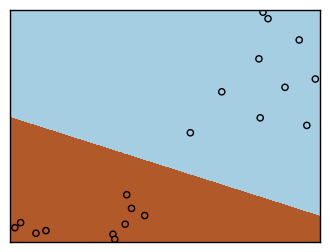

In [122]:
svm_ds = SVC(kernel='linear').fit(data_science_df_x,data_science_df_y)
decision_boundary(svm_ds,np.array(data_science_df_x),np.array(data_science_df_y))

- The boundary designation for SVM appears to make a more sense. Underneath a threshold of gym hours and email hours, everyone is data scientists.

### Part 3 - Imbalanced Classes

Let's pretend this data now corresponds to credit card fraud, where a true positive means saving thousands of dollars and maintaining customer loyalty while a false positive means us calling the customer and having them confirm that they were the ones to make the purchase (a small cost for letting fraudsters escape). How can you catch as many true positives (fraudsters) as possible? 

1. Now create variables X_small, y_small which are subsets of the iris data. You can run the "annihilate_data" function to remove the data.
2. What do the class counts look like now? Plot the data.
3. Run an LRC and plot the decision boundary. What is the behavior of the model? 
4. Now plot the decision boundary for an SVM. What is the behavior? Change the kernels. Does anything happen? 
5. Now as the data scientist, you should be able to look at documentation and figure out what the best tool for the job will be. Looking at the SVC inputs, what variable can you change to fix this problem? Plot the decision boundary after you have made this adjustment.


In [16]:
# Use 2= 0 
X_small, y_small = data_iris[:,:2],labels_iris_2

In [17]:
y_small

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

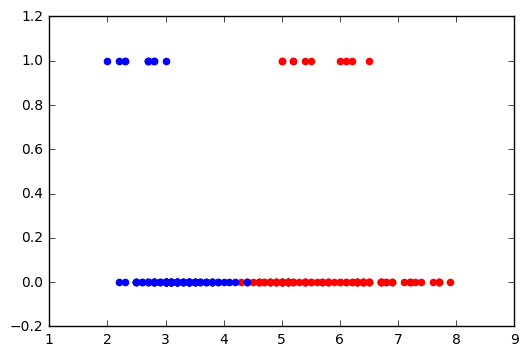

In [18]:
X_small_ann , y_small_ann = annihilate_data(X_small,y_small)
plt.scatter(X_small_ann[:,0],y_small_ann,color='r')
plt.scatter(X_small_ann[:,1],y_small_ann,color='b')

In [164]:
logit_imbalanced = LogisticRegression().fit(X_small_ann,y_small_ann)

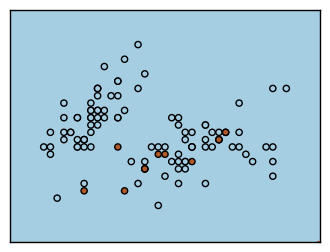

In [165]:
decision_boundary(logit_imbalanced,X_small_ann,y_small_ann)

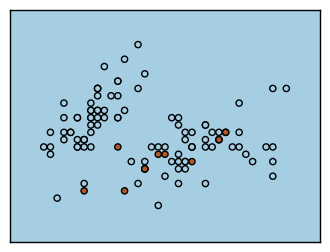

In [167]:
svm_imbalanced = SVC(kernel='rbf').fit(X_small_ann,y_small_ann)
decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

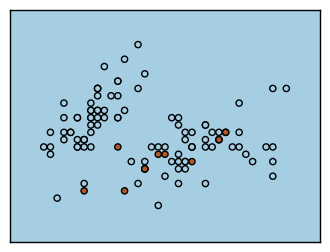

In [168]:
svm_imbalanced = SVC(kernel='poly').fit(X_small_ann,y_small_ann)
decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

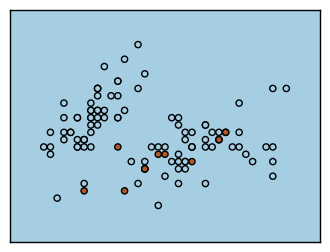

In [170]:
svm_imbalanced = SVC(kernel='linear').fit(X_small_ann,y_small_ann)
decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

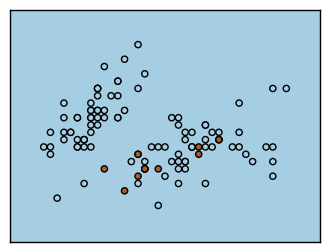

In [180]:
svm_imbalanced = SVC(kernel='sigmoid').fit(X_small_ann,y_small_ann)
decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

- No decision boundaries. Try changing the parameters.

Gamma :10


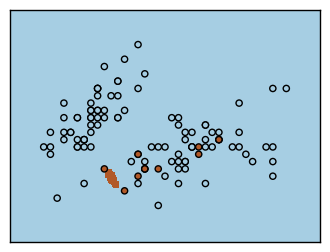

Gamma :20


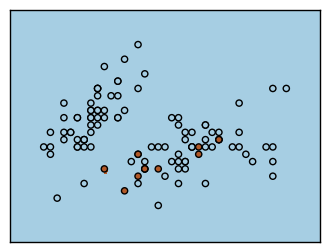

Gamma :30


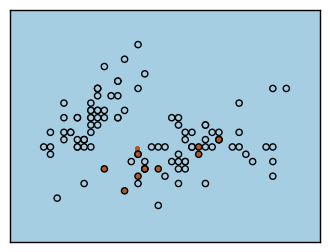

Gamma :40


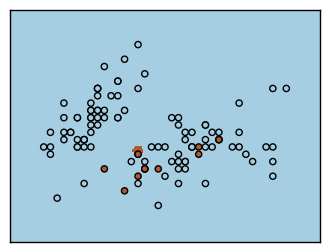

Gamma :50


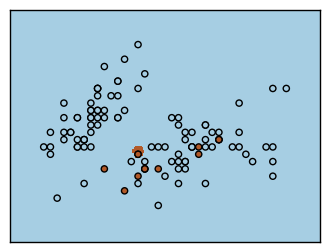

Gamma :60


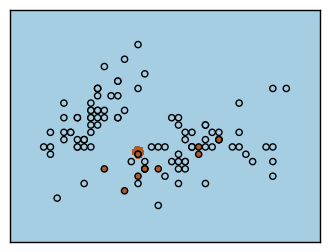

Gamma :70


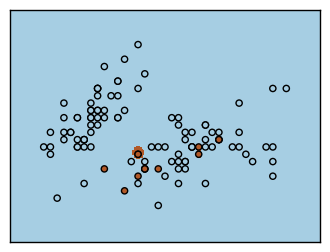

Gamma :80


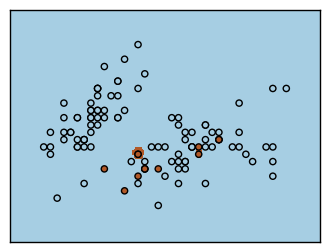

In [204]:
for i in range(10,90,10):
    print('Gamma :{}'.format(i))
    svm_imbalanced = SVC(kernel='rbf',gamma=i).fit(X_small_ann,y_small_ann)
    decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

Penalty : 1000


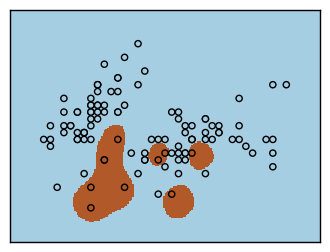

Penalty : 1250


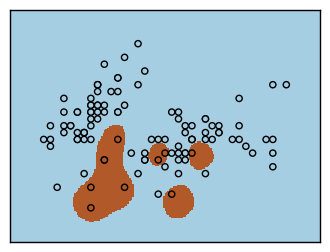

Penalty : 1500


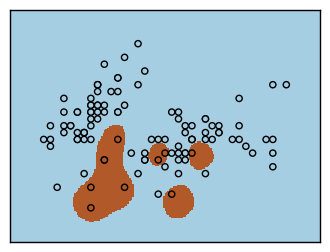

Penalty : 1750


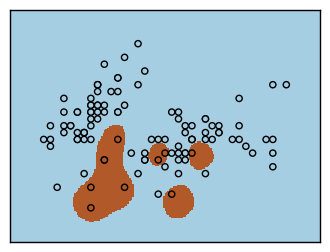

Penalty : 2000


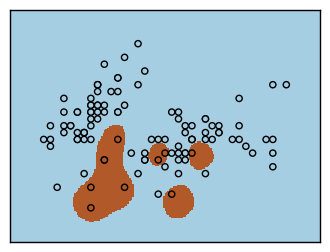

Penalty : 2250


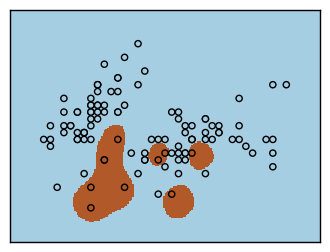

Penalty : 2500


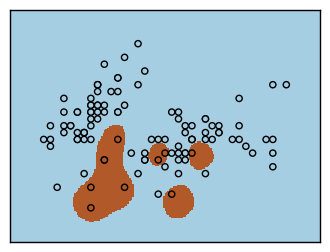

Penalty : 2750


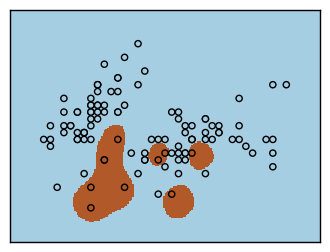

Penalty : 3000


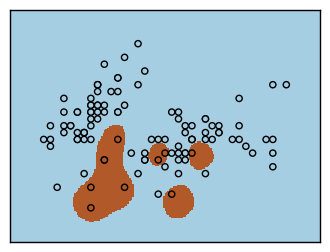

Penalty : 3250


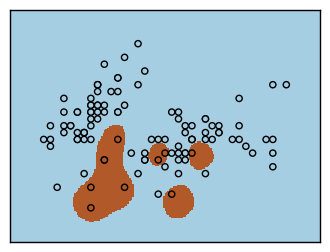

Penalty : 3500


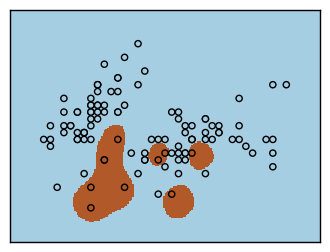

Penalty : 3750


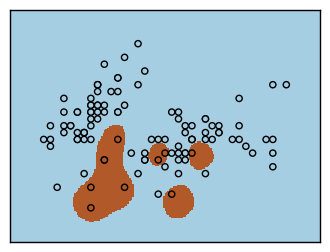

Penalty : 4000


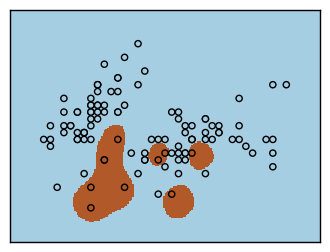

Penalty : 4250


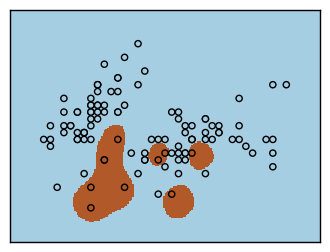

Penalty : 4500


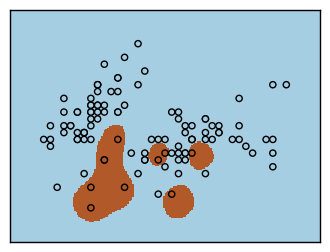

Penalty : 4750


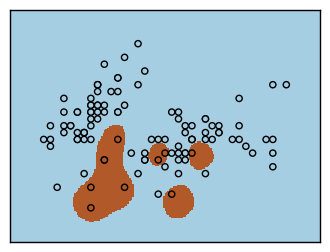

Penalty : 5000


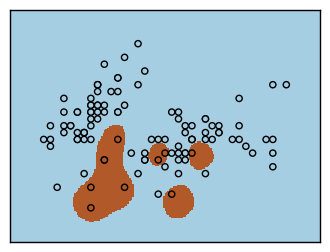

Penalty : 5250


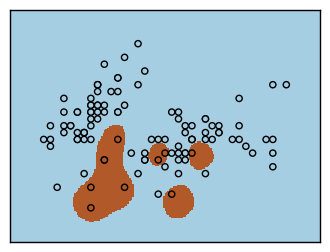

Penalty : 5500


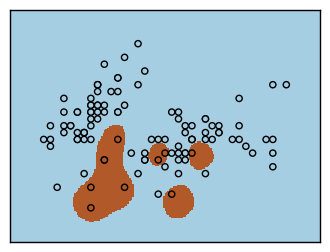

Penalty : 5750


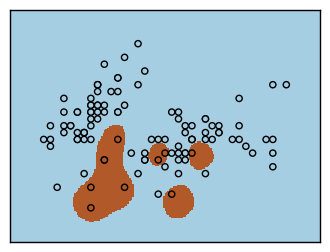

Penalty : 6000


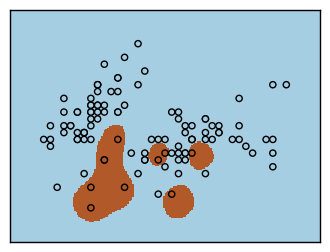

Penalty : 6250


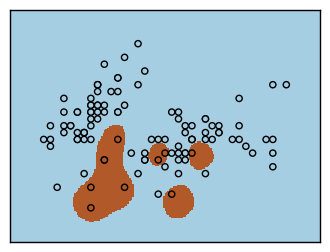

Penalty : 6500


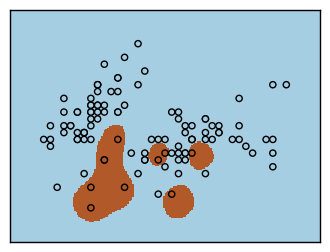

Penalty : 6750


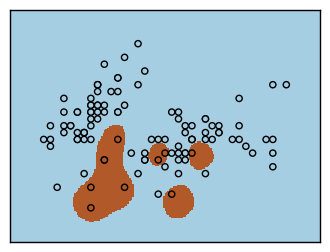

Penalty : 7000


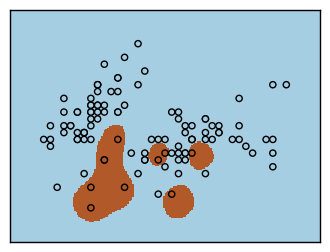

Penalty : 7250


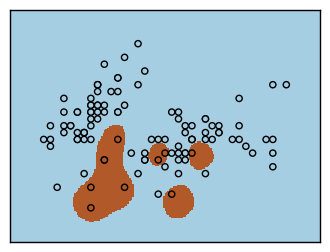

Penalty : 7500


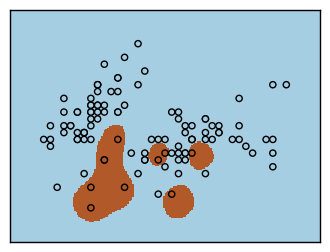

Penalty : 7750


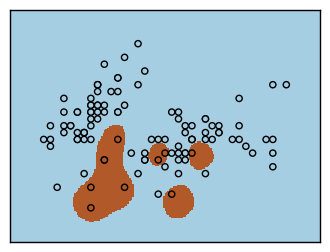

Penalty : 8000


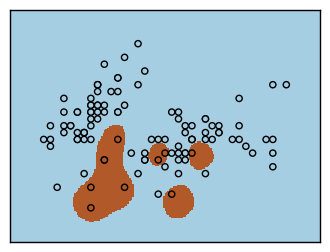

Penalty : 8250


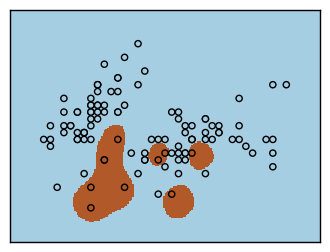

Penalty : 8500


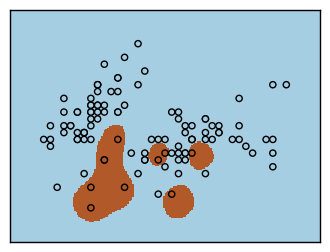

Penalty : 8750


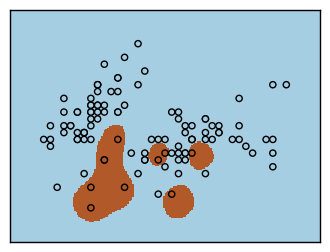

Penalty : 9000


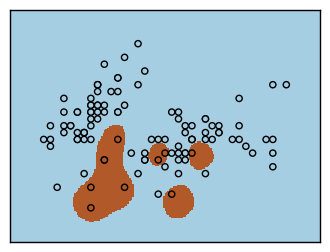

Penalty : 9250


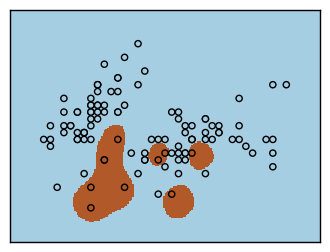

Penalty : 9500


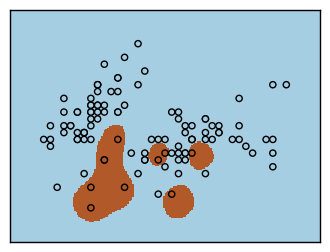

Penalty : 9750


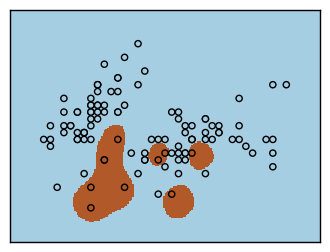

In [20]:
# try changing the penalty terms
for i in range(1000,10000,250):
    print('Penalty : {}'.format(i))
    svm_imbalanced = SVC(kernel='rbf',gamma=10,C=i).fit(X_small_ann,y_small_ann)
    decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

In [19]:
print('hi')

hi


In [207]:
## Best RBF with gamma at ~10 and penalty at ~3500

## try another kernel

Gamma :1


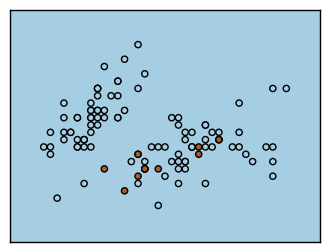

Gamma :21


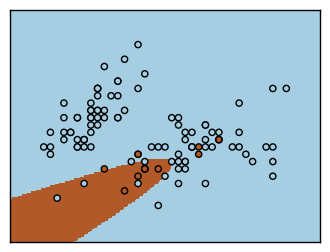

Gamma :41


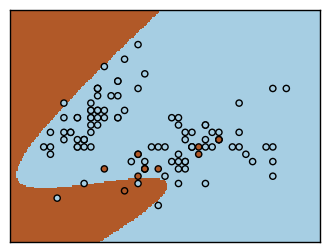

Gamma :61


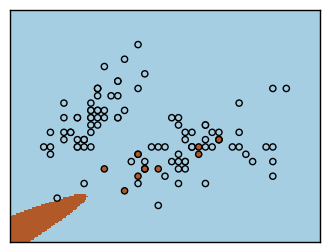

Gamma :81


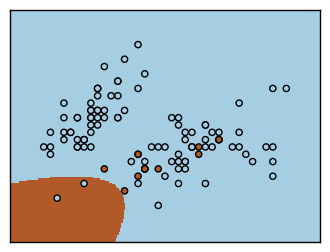

In [198]:
for i in range(1,90,20):
    print('Gamma :{}'.format(i))
    svm_imbalanced = SVC(kernel='poly',gamma=i).fit(X_small_ann,y_small_ann)
    decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

In [199]:
# best gamma around ~20 for poly kernel, try changin error

Penalty : 1


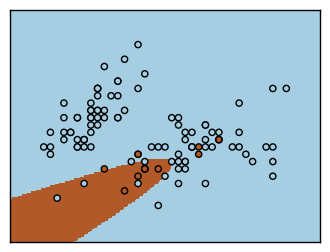

Penalty : 101


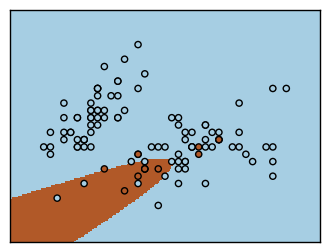

Penalty : 201


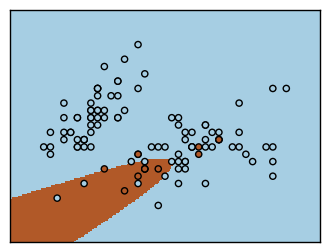

Penalty : 301


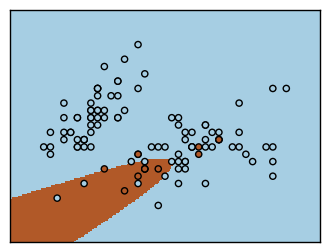

Penalty : 401


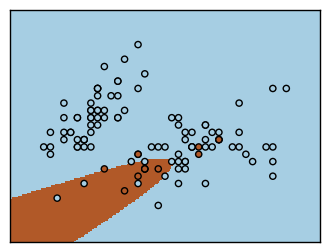

Penalty : 501


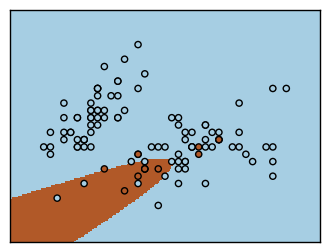

Penalty : 601


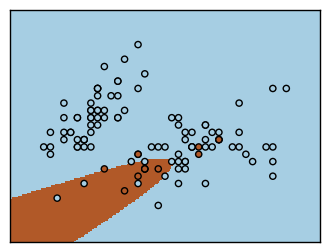

Penalty : 701


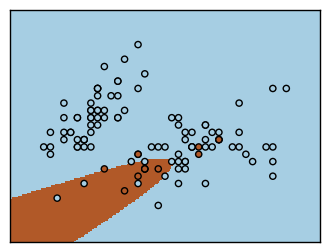

Penalty : 801


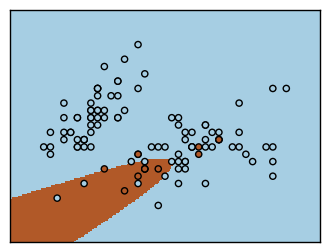

Penalty : 901


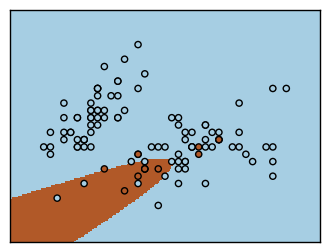

In [206]:
# try changing the penalty terms
for i in range(1,1000,100):
    print('Penalty : {}'.format(i))
    svm_imbalanced = SVC(kernel='poly',gamma=21,C=i).fit(X_small_ann,y_small_ann)
    decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

In [208]:
# try changing the degree of poly with gamma at 20 and error at 1

Degree : 1


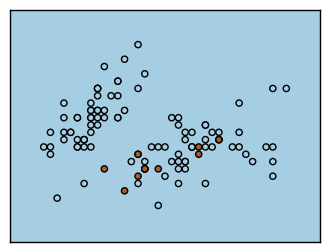

Degree : 2


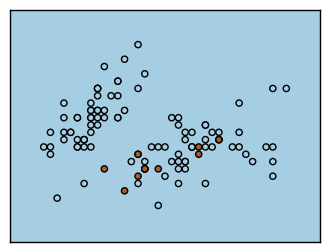

Degree : 3


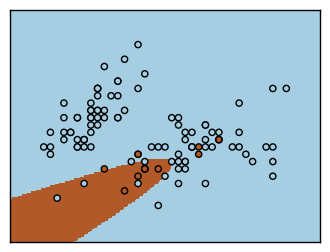

Degree : 4


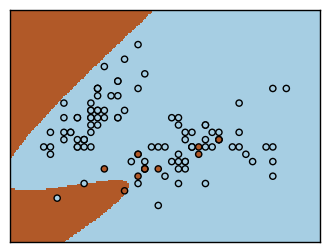

Degree : 5


In [ ]:
# try changing the penalty terms
for i in range(1,10,1):
    print('Degree : {}'.format(i))
    svm_imbalanced = SVC(kernel='poly',gamma=21,C=1,degree=i).fit(X_small_ann,y_small_ann)
    decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

## Best RBF with gamma at ~2 and penalty at ~5000. However, this model is still very britle (hard decision boundaries). 

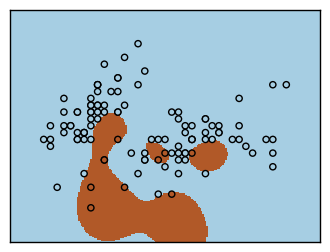

In [47]:
# try changing the penalty terms

svm_imbalanced = SVC(kernel='rbf',gamma=2,C=10000,).fit(X_small_ann,y_small_ann)
decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

Now as the data scientist, you should be able to look at documentation and figure out what the best tool for the job will be. Looking at the SVC inputs, what variable can you change to fix this problem? Plot the decision boundary after you have made this adjustment.

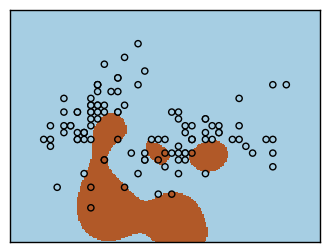

In [61]:
# try changing the penalty terms

svm_imbalanced = SVC(kernel='rbf',gamma=2,C=100000).fit(X_small_ann,y_small_ann)
decision_boundary(svm_imbalanced ,X_small_ann,y_small_ann)

- This appears to be the best classification because it gives some extrs space to classify future points.